<h2>Project<h2/> 

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [3]:
energy=pd.read_csv("energy_production.csv", sep = ';', header = 0)
energy

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [4]:
## Data type conversion
print(energy.info())
print(energy.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None
(9568, 5)


In [5]:
energy.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
#Check for missing values in my dataset
energy.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [7]:
#Check of duplicated rows
energy[energy.duplicated()].shape

(41, 5)

In [8]:
energy[energy.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [9]:
data_cleaned=energy.drop_duplicates()

In [10]:
data_cleaned.shape

(9527, 5)

In [11]:
data_cleaned

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


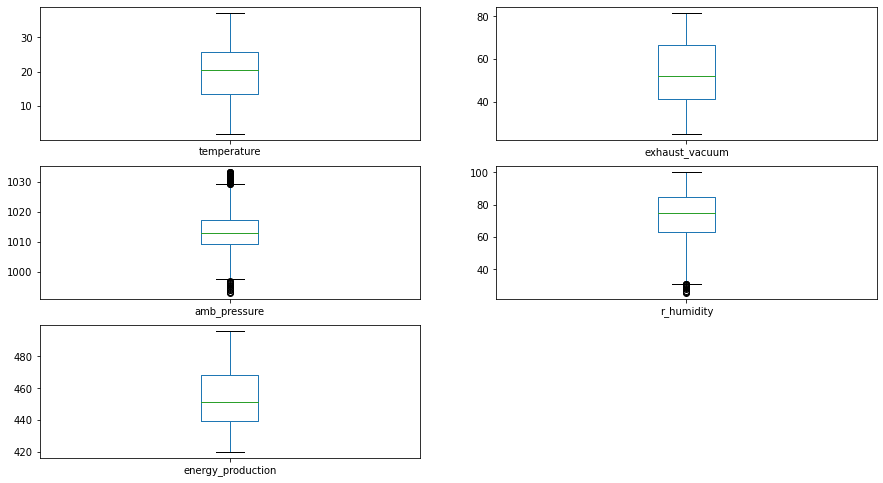

In [12]:
# box plot
data_cleaned.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'exhaust_vacuum'}>],
       [<AxesSubplot:title={'center':'amb_pressure'}>,
        <AxesSubplot:title={'center':'r_humidity'}>],
       [<AxesSubplot:title={'center':'energy_production'}>,
        <AxesSubplot:>]], dtype=object)

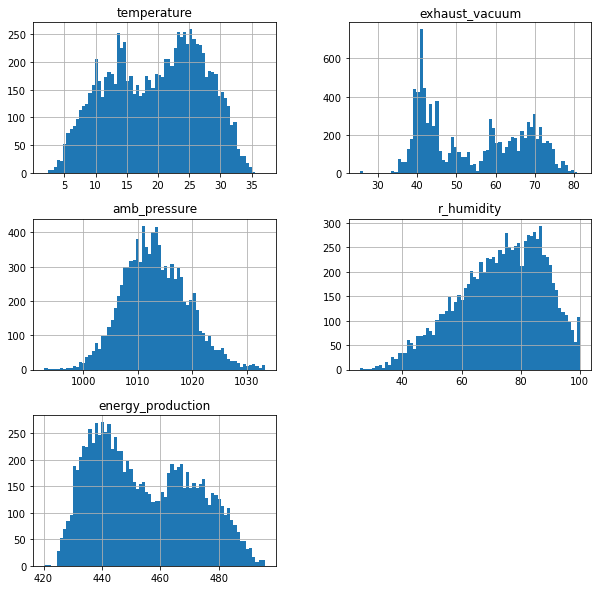

In [13]:
data_cleaned.hist(bins=70 ,figsize=(10 ,10))

In [14]:
# correlation
data_cleaned.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


<AxesSubplot:>

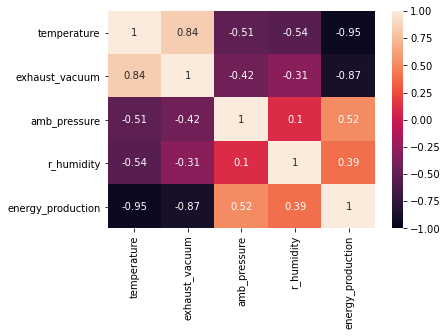

In [15]:
sns.heatmap(data_cleaned.corr(), vmin = -1, vmax = 1, annot = True)

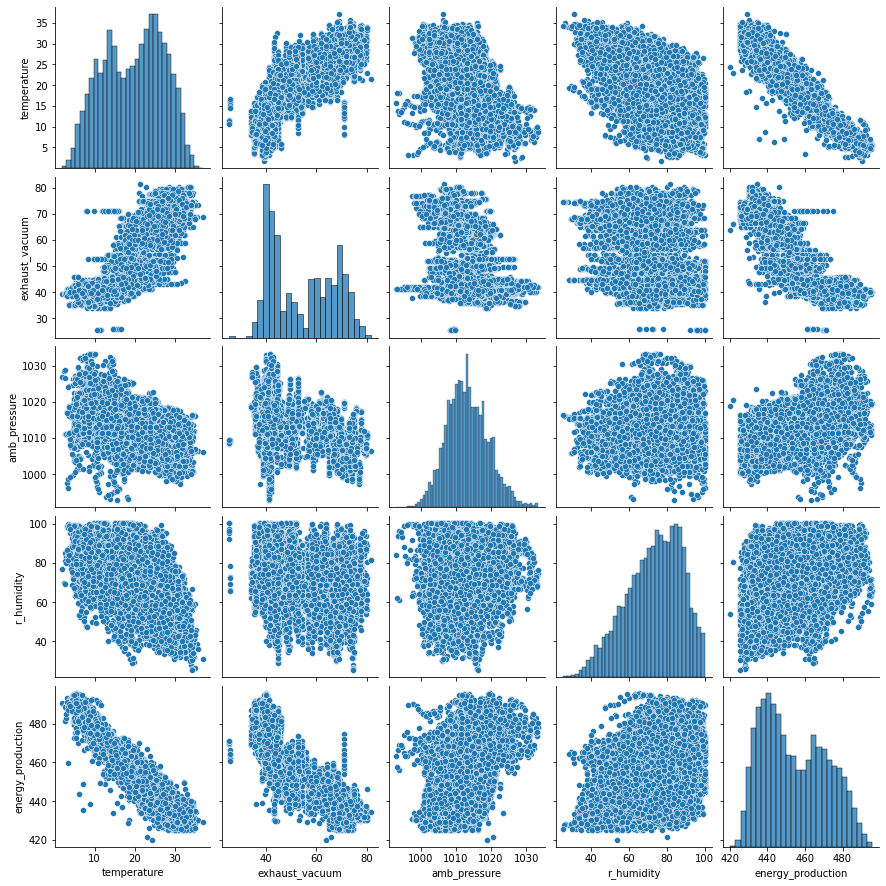

In [16]:
sns.pairplot(data_cleaned)

<h2>Model Building<h2/> 

In [17]:
X = data_cleaned[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']].values
y = data_cleaned['energy_production'].values


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7621, 4)
(1906, 4)
(7621,)
(1906,)


In [20]:
from sklearn.metrics import mean_squared_error

<h2>Linear  Regression<h2/>

In [105]:
LinearRegression = LinearRegression()  
LinearRegression.fit(X_train, y_train)

LinearRegression()

In [106]:
cross_val_score(LinearRegression,X_train,y_train).mean()

0.9273119516849351

In [107]:
y_pred = LinearRegression.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 3.628077390103724
Mean Squared Error: 20.41977133398602


In [112]:
rmse1= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse1)

Root Mean Squared Error:: 4.51882410965353


In [111]:
r21=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r21)

Root Mean Squared Error: 0.9320678090790351


In [32]:
result= LinearRegression.score(X_test, y_test)
result

0.9320678090790351

In [33]:
result= LinearRegression.score(X_train, y_train)
result

0.9274023168097598

Text(0, 0.5, 'Predictions')

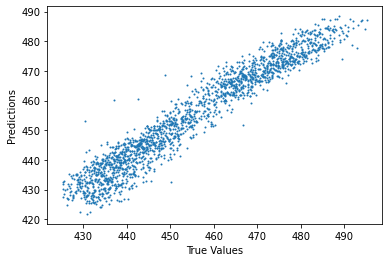

In [113]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>Random Forest Regressor<h2/>

In [114]:
RandomForestRegressor= RandomForestRegressor(n_estimators=10)
RandomForestRegressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [115]:

cross_val_score(RandomForestRegressor,X_train,y_train).mean()

0.9530602575860403

In [116]:
y_pred = RandomForestRegressor.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 2.4634066107030423
Mean Squared Error: 11.696247674186777


In [117]:
rmse2= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse2)

Root Mean Squared Error:: 3.4199777300717584


In [118]:
r22=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r22)

R2 Score: 0.9610890975679379


In [119]:
result = RandomForestRegressor.score(X_test, y_test)
result

0.9610890975679379

In [120]:
result = RandomForestRegressor.score(X_train, y_train)
result

0.9924313832770235

Text(0, 0.5, 'Predictions')

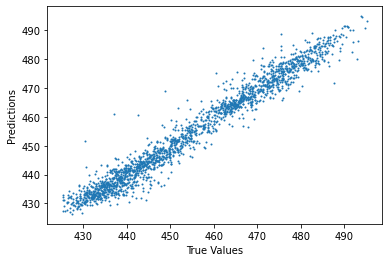

In [121]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>Decision Tree Regressor<h2/>

In [122]:
DecisionTreeRegressor= DecisionTreeRegressor()
DecisionTreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [123]:
cross_val_score(DecisionTreeRegressor,X_train,y_train).mean()

0.9265130214940995

In [124]:
y_pred = DecisionTreeRegressor.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 3.0649475341028327
Mean Squared Error: 20.424767208814263


In [125]:
rmse3= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse3)

Root Mean Squared Error:: 4.519376860676067


In [126]:
r23=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r23)

R2 Score: 0.932051188877119


In [127]:
result = DecisionTreeRegressor.score(X_test, y_test)
result

0.932051188877119

In [128]:
result = DecisionTreeRegressor.score(X_train, y_train)
result

1.0

Text(0, 0.5, 'Predictions')

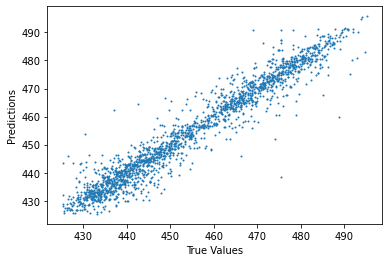

In [129]:

plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>Support Vector Regression<h2/>

In [130]:
SVR= SVR(kernel='poly')
SVR.fit(X_train, y_train)

SVR(kernel='poly')

In [131]:
cross_val_score(SVR,X_train,y_train).mean()

0.6894241683490757

In [132]:
y_pred = SVR.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 7.035784717356188
Mean Squared Error: 79.76197571858302


In [133]:
rmse4= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse4)

Root Mean Squared Error:: 8.930956036090594


In [134]:
r24=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r24)

R2 Score: 0.7346490480170105


In [135]:
result = SVR.score(X_test, y_test)
result

0.7346490480170105

In [136]:
result = SVR.score(X_train, y_train)
result

0.7345410554445002

Text(0, 0.5, 'Predictions')

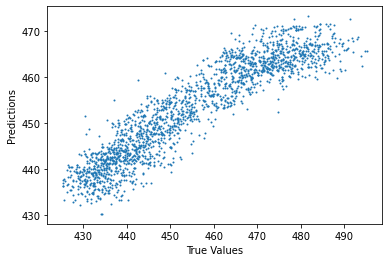

In [137]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>GradientBoostingRegressor<h2/>

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [140]:
cross_val_score(GradientBoostingRegressor,X_train,y_train).mean()

0.9468640227188804

In [141]:
y_pred = GradientBoostingRegressor.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 2.9725698966443863
Mean Squared Error: 14.658639562282653


In [142]:
rmse5= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse5)

Root Mean Squared Error:: 3.8286602829557306


In [143]:
r25=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r25)

R2 Score: 0.9512338563885273


In [144]:
result = GradientBoostingRegressor.score(X_test, y_test)
result

0.9512338563885273

In [145]:
result = GradientBoostingRegressor.score(X_train, y_train)
result

0.9518897536744114

Text(0, 0.5, 'Predictions')

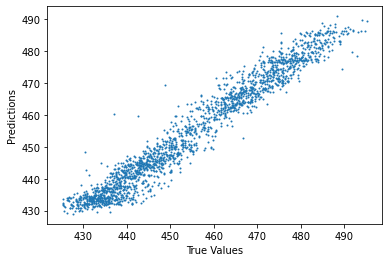

In [146]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>KNeighbors Regressor<h2/>

In [147]:
KNeighborsRegressor = KNeighborsRegressor(n_neighbors=3)
KNeighborsRegressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [148]:
cross_val_score(KNeighborsRegressor,X_train,y_train).mean()

0.9390701694874327

In [149]:
y_pred = KNeighborsRegressor.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 3.0082039174536543
Mean Squared Error: 16.734727462982395


In [150]:
rmse6= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse6)

Root Mean Squared Error:: 4.090810123066383


In [151]:
r26=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r26)

R2 Score: 0.9443271581041881


In [152]:
result = KNeighborsRegressor.score(X_test, y_test)
result

0.9443271581041881

In [153]:
result = KNeighborsRegressor.score(X_train, y_train)
result

0.9728052975954887

Text(0, 0.5, 'Predictions')

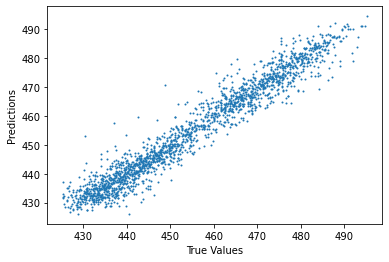

In [154]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [155]:
# model2 = RandomForestRegressor(n_estimators=1000)
# model2.fit(X_train,y_train)
# model2.predict(X_test)

<h2>Adaboost<h2/>

In [156]:
AdaBoostRegressor = AdaBoostRegressor(n_estimators=100)
AdaBoostRegressor.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [157]:
cross_val_score(AdaBoostRegressor,X_train,y_train).mean()

0.8941543705094628

In [158]:
y_pred = AdaBoostRegressor.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 4.279883889967177
Mean Squared Error: 29.152990094528377


In [159]:
rmse7= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse7)

Root Mean Squared Error:: 5.39935089566592


In [160]:
r27=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r27)

R2 Score: 0.9030142670734838


In [161]:
result = AdaBoostRegressor.score(X_test, y_test)
result

0.9030142670734838

In [162]:
result = AdaBoostRegressor.score(X_train, y_train)
result

0.9006725830930589

Text(0, 0.5, 'Predictions')

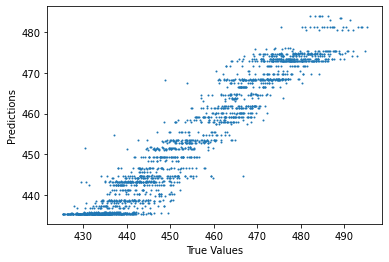

In [163]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>Lasso<h2/>

In [164]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [165]:
Lasso = Lasso(alpha=4)
Lasso.fit(X_train, y_train)

Lasso(alpha=4)

In [166]:
cross_val_score(Lasso,X_train,y_train).mean()

0.9236410853270094

In [167]:
y_pred = Lasso.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 3.7158863863781955
Mean Squared Error: 21.41512765110564


In [168]:
rmse8= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse8)

Root Mean Squared Error:: 4.627648177109582


In [169]:
r28=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r28)

R2 Score: 0.9287564725188445


In [170]:
result = Lasso.score(X_test, y_test)
result

0.9287564725188445

In [171]:
result = Lasso.score(X_train, y_train)
result

0.9237313845512681

Text(0, 0.5, 'Predictions')

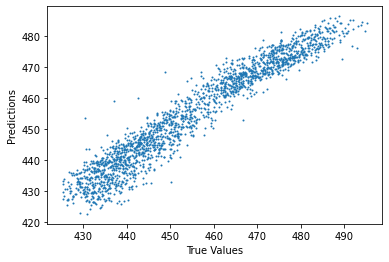

In [172]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>Ridge<h2/>

In [173]:
Ridge = Ridge(alpha=4)
Ridge.fit(X_train, y_train)

Ridge(alpha=4)

In [174]:
cross_val_score(Ridge,X_train,y_train).mean()

0.9273119536620869

In [175]:
y_pred = Ridge.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 3.6280940570069773
Mean Squared Error: 20.419792267988136


In [176]:
rmse9= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse9)

Root Mean Squared Error:: 4.51882642596373


In [177]:
r29=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r29)

R2 Score: 0.9320677394361089


In [178]:
result = Ridge.score(X_test, y_test)
result

0.9320677394361089

In [179]:
result = Ridge.score(X_train, y_train)
result

0.9274023164461593

Text(0, 0.5, 'Predictions')

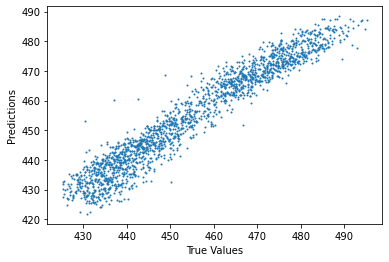

In [180]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<h2>XGBRegressor<h2/>

In [181]:
from xgboost import XGBRegressor

In [182]:
XGBRegressor = XGBRegressor()
XGBRegressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [183]:
cross_val_score(XGBRegressor,X_train,y_train).mean()

0.9617102453362346

In [184]:
y_pred = XGBRegressor.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 2.278585848092782
Mean Squared Error: 9.712639388804156


In [185]:
rmse10= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse10)

Root Mean Squared Error:: 3.11651077148855


In [186]:
r210=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r210)

R2 Score: 0.9676881360464318


In [189]:
result =XGBRegressor.score(X_test, y_test)

result

0.9676881360464318

In [190]:
result = XGBRegressor.score(X_train, y_train)
result

0.9861067738462003

Text(0, 0.5, 'Predictions')

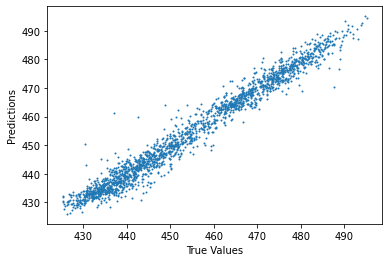

In [191]:
plt.scatter(y_test, y_pred, s=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [192]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam # - Works
from keras.layers import Dropout

In [193]:
NeuralNetwork = Sequential()
NeuralNetwork.add(Dense(12, input_dim = 4,kernel_initializer = 'uniform', activation = 'relu'))
NeuralNetwork.add(Dense(8,input_dim = 4,kernel_initializer = 'uniform', activation = 'relu'))
NeuralNetwork.add(Dense(1,kernel_initializer = 'uniform', activation = 'linear'))

In [194]:
opti=Adam(learning_rate=0.001)

In [195]:
NeuralNetwork.compile(loss = 'mean_squared_error', optimizer=opti, metrics=['mse'])

In [196]:
NeuralNetwork.fit(X_train, y_train, validation_split = 0.20,epochs=100, batch_size=4)

Epoch 1/100
1524/1524 [==============================] - 6s 2ms/step - loss: 16466.7422 - mse: 16466.7422 - val_loss: 285.5155 - val_mse: 285.5155
Epoch 2/100
1524/1524 [==============================] - 3s 2ms/step - loss: 198.1357 - mse: 198.1357 - val_loss: 120.9805 - val_mse: 120.9805
Epoch 3/100
1524/1524 [==============================] - 2s 1ms/step - loss: 83.4691 - mse: 83.4691 - val_loss: 51.8274 - val_mse: 51.8274
Epoch 4/100
1524/1524 [==============================] - 3s 2ms/step - loss: 45.4486 - mse: 45.4486 - val_loss: 35.4923 - val_mse: 35.4923
Epoch 5/100
1524/1524 [==============================] - 2s 2ms/step - loss: 35.7261 - mse: 35.7261 - val_loss: 27.9010 - val_mse: 27.9010
Epoch 6/100
1524/1524 [==============================] - 2s 2ms/step - loss: 33.3184 - mse: 33.3184 - val_loss: 33.7060 - val_mse: 33.7060
Epoch 7/100
1524/1524 [==============================] - 3s 2ms/step - loss: 31.3606 - mse: 31.3606 - val_loss: 27.5385 - val_mse: 27.5385
Epoch 8/100
152

In [198]:
# evaluate the model
scores = NeuralNetwork.evaluate(X_train,y_train)
print("%s: %.2f%%" % (NeuralNetwork.metrics_names[1], scores[1]*100))

239/239 [==============================] - 0s 897us/step - loss: 33.1699 - mse: 33.1699
mse: 3316.99%


In [199]:
history = NeuralNetwork.fit(X_train,y_train, validation_split = 0.20, epochs=100, batch_size = 4)

Epoch 1/100
1524/1524 [==============================] - 2s 1ms/step - loss: 30.3059 - mse: 30.3059 - val_loss: 25.3443 - val_mse: 25.3443
Epoch 2/100
1524/1524 [==============================] - 3s 2ms/step - loss: 30.4193 - mse: 30.4193 - val_loss: 37.2406 - val_mse: 37.2406
Epoch 3/100
1524/1524 [==============================] - 2s 2ms/step - loss: 30.4424 - mse: 30.4424 - val_loss: 26.0655 - val_mse: 26.0655
Epoch 4/100
1524/1524 [==============================] - 2s 2ms/step - loss: 31.0317 - mse: 31.0317 - val_loss: 27.0565 - val_mse: 27.0565
Epoch 5/100
1524/1524 [==============================] - 2s 1ms/step - loss: 30.2261 - mse: 30.2261 - val_loss: 27.2455 - val_mse: 27.2455
Epoch 6/100
1524/1524 [==============================] - 2s 1ms/step - loss: 30.3901 - mse: 30.3901 - val_loss: 28.9433 - val_mse: 28.9433
Epoch 7/100
1524/1524 [==============================] - 3s 2ms/step - loss: 29.8396 - mse: 29.8396 - val_loss: 25.8005 - val_mse: 25.8005
Epoch 8/100
1524/1524 [====

In [200]:
# Visualize training history
# list all data in history
NeuralNetwork.history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

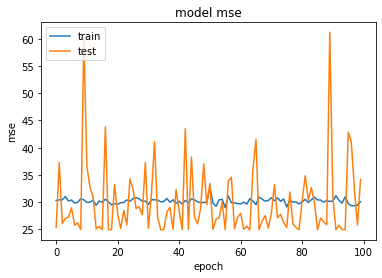

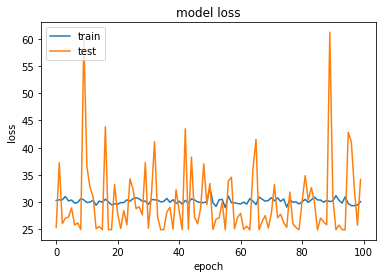

In [201]:
# Summarize history for accuracy
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [202]:
y_pred= NeuralNetwork.predict(X_test)

In [203]:
y_prtrain=NeuralNetwork.predict(X_train)

In [214]:
rmse11= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error::',rmse11)

Root Mean Squared Error:: 5.690189756868004


In [215]:
r211=metrics.r2_score(y_test, y_pred)
print('R2 Score:', r211)

R2 Score: 0.8922844889899881


In [216]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.693180411339807
Mean Squared Error: 32.378259469165556


In [219]:
model_data =[["LinearRegression",rmse1,r21],["RandomForestRegressor",rmse2,r22],["DecisionTreeRegressor",rmse3,r23],
             ["SVR",rmse4,r24],["GradientBoostingRegressor",rmse5,r25],
             ["KNeighborsRegressor",rmse6,r26],
             ["AdaBoostRegressor",rmse7,r27],["Lasso",rmse8,r28],["Ridge",rmse9,r29],
             ["XGBRegressor",rmse10,r210],["NeuralNetwork",rmse11,r211]]


In [220]:
model_data= pd.DataFrame(model_data,columns=['Models','rmse','r2'])

In [222]:
model_data.sort_values(by=['rmse'],ascending=True)

,Models,rmse,r2
9,XGBRegressor,3.116511,0.967688
1,RandomForestRegressor,3.419978,0.961089
4,GradientBoostingRegressor,3.828660,0.951234
5,KNeighborsRegressor,4.090810,0.944327
0,LinearRegression,4.518824,0.932068
8,Ridge,4.518826,0.932068
2,DecisionTreeRegressor,4.519377,0.932051
7,Lasso,4.627648,0.928756
6,AdaBoostRegressor,5.399351,0.903014
10,NeuralNetwork,5.690190,0.892284


<h2>Model Deployment<h2/>

In [223]:
import pickle
pickle_out = open("RandomForestRegressor.pkl","wb")
pickle.dump(RandomForestRegressor, pickle_out)
pickle_out.close()